# Wykrywanie krawędzi za pomocą Canny Filter

#### Importowanie bibliotek

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

#### Implementacja funkcji do wyświetlania obrazów i histogramów

In [2]:
def show_image(image, title=""):
    if image.ndim == 2:
        plt.imshow(image,cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)

In [3]:
def show_histogram(image):
    plt.figure(figsize=(10,5), dpi=80)
    plt.subplot(1,2,1)
    show_image(image)
    plt.subplot(1,2,2)
    histogram = cv2.calcHist([image],[0],None,[256],[0,256])
    plt.plot(histogram)
    plt.xlim([0,256])
    plt.show()

#### Wczytanie obrazu i analiza

In [4]:
image_1 = cv2.imread('../grey_images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png', cv2.CV_8UC1,)

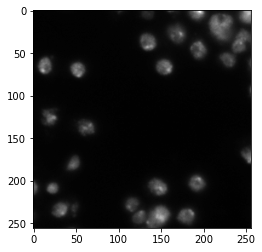

In [5]:
show_image(image_1)

Na początku spróbuję wykorzystać zaimplementowany filtr Canny'ego do wykrywania krawędzi z różnymi progami.

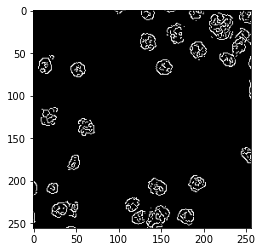

In [6]:
edges_1 = cv2.Canny(image_1, 10, 30)
show_image(edges_1)

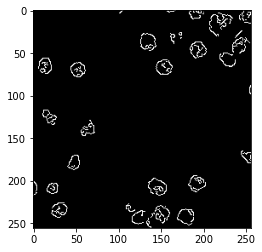

In [7]:
edges_2 = cv2.Canny(image_1, 40, 80)
show_image(edges_2)

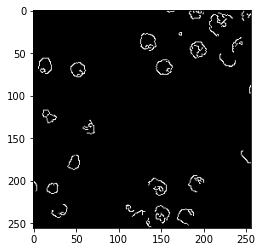

In [8]:
edges_3 = cv2.Canny(image_1, 50, 100)
show_image(edges_3)

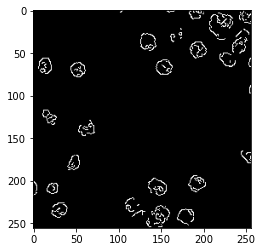

In [9]:
edges_4 = cv2.Canny(image_1, 50, 70)
show_image(edges_4)

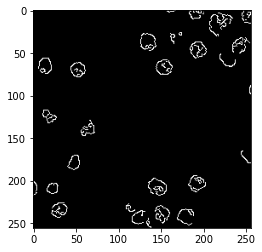

In [10]:
edges_5 = cv2.Canny(image_1, 40, 90)
show_image(edges_5)

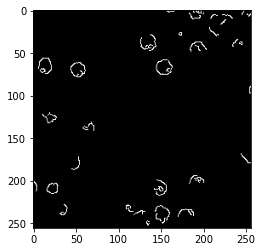

In [11]:
edges_6 = cv2.Canny(image_1, 70, 110)
show_image(edges_6)

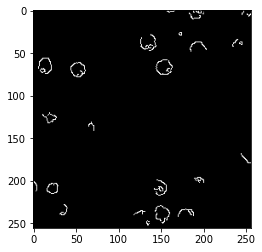

In [12]:
edges_7 = cv2.Canny(image_1, 70, 120)
show_image(edges_7)

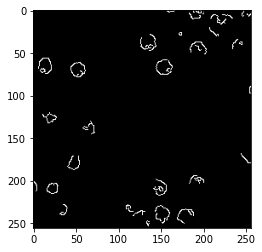

In [13]:
edges_8 = cv2.Canny(image_1, 65, 110)
show_image(edges_8)

Możemy zauważyć, że dla kilku prób bardzo trudno jest osiągnąć oczekiwany efekt, ze względu na różne odcienie wewnątrz komórek. Powoduje to wykrywanie nieprzydatnych, a nawet niepożądanych krawędzi, które uniemożliwiają późniejsze ich zliczanie. W przypadku progów (10, 30) krawędzie zostały uzyskane bardzo dobrze, natomiast dodatkowo zostały wykryte niepożądane krawędzie. Każda następna iteracja była próbą uzyskania podobnego efektu, natomiast już bez krawędzi wewnętrznych komórek. Nie uzyskałem satysfakcjonującego rezultatu.

W celu uzyskania jednolitego jasnego koloru spróbuję zastosować dylatację.

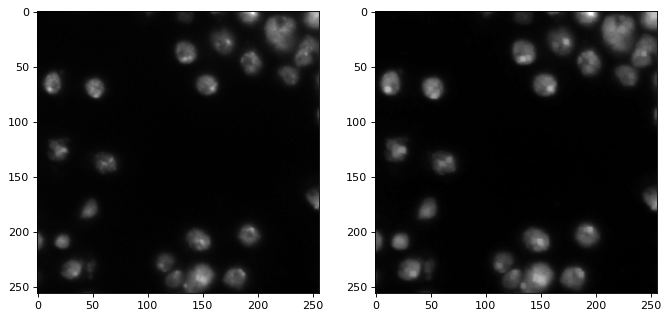

In [14]:
kernel_1 = np.ones((3,3),np.uint8)
dilation_1 = cv2.dilate(image_1, kernel_1, iterations = 1)

plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(1,2,1)
show_image(image_1)
plt.subplot(1,2,2)
show_image(dilation_1)

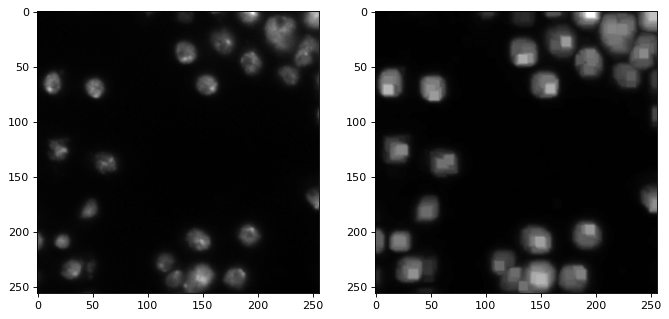

In [15]:
kernel_2 = np.ones((3,3),np.uint8)
dilation_2 = cv2.dilate(image_1, kernel_2, iterations = 3)

plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(1,2,1)
show_image(image_1)
plt.subplot(1,2,2)
show_image(dilation_2)

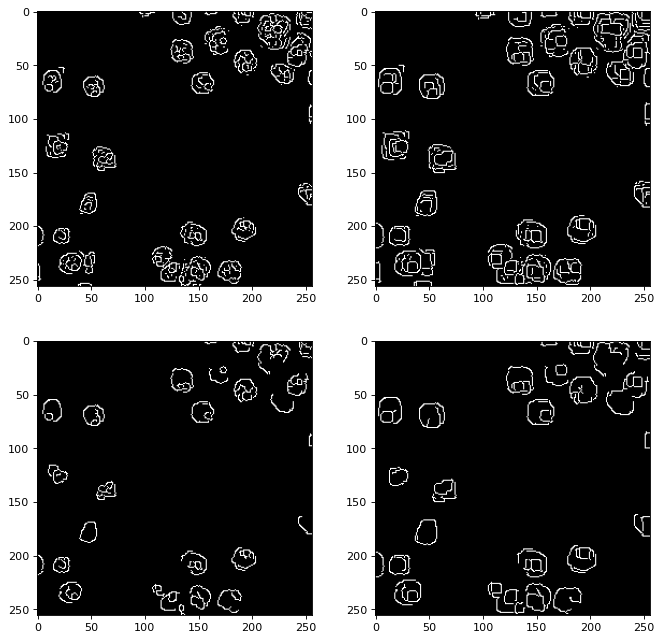

In [16]:
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(2,2,1)
show_image(cv2.Canny(dilation_1, 10, 30))
plt.subplot(2,2,2)
show_image(cv2.Canny(dilation_2, 10, 30))
plt.subplot(2,2,3)
show_image(cv2.Canny(dilation_1, 40, 90))
plt.subplot(2,2,4)
show_image(cv2.Canny(dilation_2, 40, 90))

Można zauważyć, że nie jest to dobry pomysł, ponieważ dylatacja uwypukla pewne cechy, co w następstwie prowadzi do ich krawędziowania. Zbyt duża liczba iteracji również nie wpływa dobrze, ponieważ zaczyna łączyć komórki, które są umieszczone blisko siebie.

Spróbuję wprowadzić duże rozmycie w celu zniwelowania krawędzi.

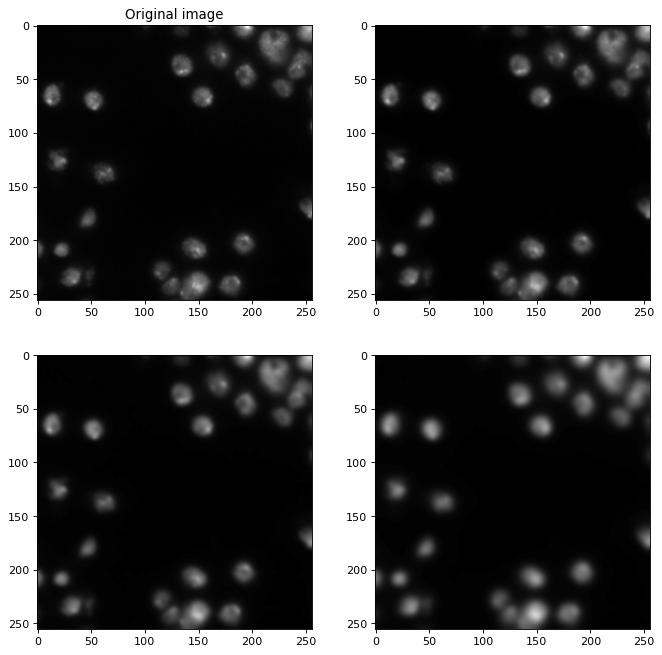

In [17]:
gauss_1 = cv2.GaussianBlur(image_1, (3, 3), 0)
gauss_2 = cv2.GaussianBlur(image_1, (7, 7), 0)
gauss_3 = cv2.GaussianBlur(image_1, (15, 15), 0)

plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(2,2,1)
show_image(image_1, 'Original image')
plt.subplot(2,2,2)
show_image(gauss_1)
plt.subplot(2,2,3)
show_image(gauss_2)
plt.subplot(2,2,4)
show_image(gauss_3)

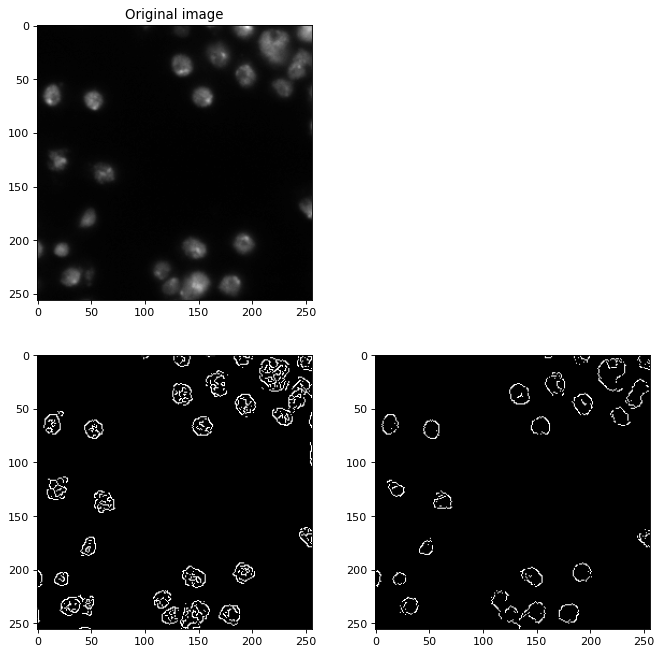

In [18]:
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(2,2,1)
show_image(image_1, 'Original image')
plt.subplot(2,2,3)
show_image(edges_1)
plt.subplot(2,2,4)
show_image(cv2.Canny(gauss_3, 15, 30))

Możemy zauważyć, że wstępne przefiltrowanie obrazu filtrem Gaussa poprawia rozpoznanie intersujących nas krawędzi. Dla podobnych wartości progowania filtrem Canny'ego -- (10, 30) bez filtru Gaussa oraz (15, 30) z filtrem Gaussa otrzymujemy dużo lepszy efekt (zminimalizowanie wykrytych wewnętrznych 'krawędzi').